<a href="https://colab.research.google.com/github/JuanCReyes1/DataScienceinPython/blob/master/ChaosControlandSynchronization(I).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chaos, Chaos Control, and Chaos Synchronization - I

##Introduction to Chaotic Dynamics
## Juan C. Reyes - Dalhousie University 
### Dec. 12, 2019.

### The following notebook is based from Stephen Lynch's Book: Dynamical Systems with Applications using Python.
### Chapter 14: Nonlinear Discrete Dynamical Systems

The aim of these exercise is to give a quick overview of chaotic dynamics (p196,360) and then see how the new and exciting field of chaos control and synchronization is being applied to a broad range of physical systems in biochemistry, cardiology, communications, cryptography, finance, and many more.


In practise, we cannot escape chaos, it is everywhere around us. It naturaly arises even in simple models in cardiology, chemical reactions, electronic circuits, population dynamics, and weather forecasting. Many scientists have tried to remove chaotic behaviour from their models and the maxim "stability good, chaos bad" came to be. However since the 1990's through developments in control theory and nonlinear dynamics scientists came to realize the potential uses for chaotic behaviour replacing the maxim with "stability good, chaos better."



# Chaos Theory

Chaos theory is an interdisciplinary theory that states that within the apparent randomness of many physical systems there are actually underlying patterns, repetition, fractals, and self-organization. The theory is often associated with the metaphor of *the buttlerfly effect* of how a butterfly flapping its wings in Mexico can cause a hurricane in Nova Scotia. Mathematically, the smallest change in a deterministic nonlinear system results in drastic differences in the system's long term behaviour. We call this *sensitivity to initial conditions*. This sensitivity to initial conditions which may arise from rounding errors in our computational models can yield diverging outcomes therefore making any long-term prediction of behaviour of a physical system impossible.

There is no universally accepted definition of chaos, but the following characteristics are often good indicators of chaotic behaviour:

* Long-term aperiodic (nonperiodic) behavior;
* Sensitivity to initial conditions;
* Fractal Structure.

We will actually observe all three of these behaviours in the next section.

# Introduction to Chaos: The Logistic Equation 
<h1><center>$ x_{n+1} = rx_{n}(1-x_{n})$</center></h1>

The logistic equation represents a very basic *demographic* model that takes into account two counteracting processes that determine the size of a population: the reproduction rate  $r$, and starvation due to a limited food supply.You might remember seeing this equation in the [Interacting Species ](https://colab.research.google.com/drive/1t5VXMG57VN21XRX3MojbQBMoWiU_bX3B)exercise! This equation is [*the*](https://www.businessinsider.com/17-equations-that-changed-the-world-2014-3#16-chaos-theory-16)       archetypal example of chaos theory and can illustrate how complex dynamical behaviour in systems may arise out of a very simple non-linear dynamical equation (note that this is just a parabola that most students learn in highschool). This equation was popularized in 1976 by a biologist known as Robert May. Let's take a look at it together.




We define the population size of a species to be the variable $x$. If there are no animals in the population then $x=0$, and if the population reaches its maximum size (due to limited food supply) then $x=1$.
The index $n$ represents the *population at the present time n* and the index $n+1$ represents the population at the next instant of time or *time step* to be *n+1*.
Remember that we build these mathematical models with the aim of prediction in mind. If we know the present population $x_{n}$ and the reproduction rate $r$, we can *determine* the population at the next time step $x_{n+1}$.

Precisely, on the right hand side of the equation we see $x_{n}$, which represents the *current* size of the population being multiplied by $r$ which represents the rate of reproduction of a particular species. This product of $r*x_{n}$ represents the new number of offspring. It seems reasonable to expect that a higher reproduction rate $r$ yields a larger population in the next time step. 

The $(1-x_{n})$ expression describes the starvation of the species due to a lack of food. This expression will always be a fraction, and thus when multiplied by the number of new offspring $r*x_{n}$,  it describes how many of the species which reproduced manage to survive.

Here is a quick example of a species that has a very high initial population but a low reproduction rate:

Assume a reproduction rate of $r=1$ and an initial population at 90% of its carrying capacity $x_{(n=0)}=0.9$ .
Inputting this information into our logistic equation yields the population at the next time step $x_{(n=1)}$:

$ x_{n+1} = rx_{n}(1-x_{n})$

$x_{(n=1)} = 1*0.9*(1-0.9)$

$x_{(n=1)} = 1*0.9*0.1$

$x_{(n=1)} = 0.09$

Meaning that our population plummeted from $x_{(n=0)}=0.9$ (90%) to $x_{(n=1)} = 0.09$ (9%) in a single time step.

If we apply our newly calculated population value $x_{(n=1)}$ we can perform this calculation again for the next time step $x_{(n=2)}$ yielding:

$x_{(n=2)} = 1*0.09*(1-0.09)$

$x_{(n=2)} = 1*0.09*0.91$

$x_{(n=2)} = 0.0819$

This new population value of $x_{(n=2)}=0.0819$ decreased yet again from our previous time step $x_{(n=1)}=0.09$. 

We could keep performing these calculations by hand indefinetely to get more information on our system (and in fact, this is precisely the advantage of having computers!) but we can guess through intuition what is going to happen.
The initial population $x_{(n=0)}=0.9$ given the reproduction rate $r=1$ is ***unstable***, and without any external stimulus, the *long term behaviour* of the population $x$ will seek to ***stabilize*** towards $0$.

As we will see, by simply *varying* the value of the reproduction rate parameter $r$ we will notice a broad range of dynamic behaviour such as *(in)stability*, *periodicity*, *quasiperiodicity*, and *chaos*.




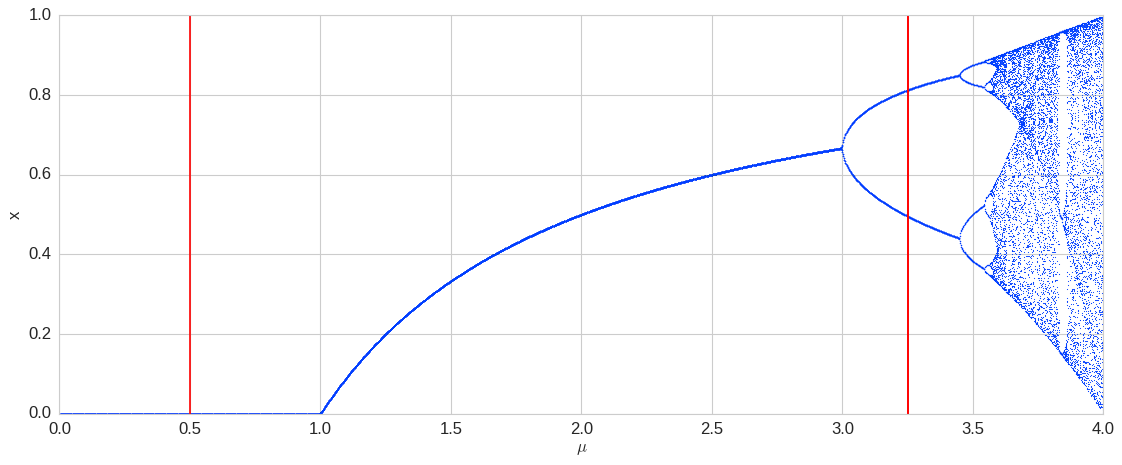

In [65]:
#@title Bifurcation Diagram for the Logistic Equation
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style 
style.use('seaborn-whitegrid')

def f(x, r):
    return r * x * (1 - x)

ys = []
rs = np.linspace(0, 4, 2000)
#rs = np.linspace(3.5, 4, 2000) # For Figure 14.16.
for r in rs:
    x = 0.1
    for i in range(500):
        x = f(x, r)
    for i in range(50):
        x = f(x, r)
        ys.append([r, x])

ys = np.array(ys)

fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(ys[:, 0], ys[:, 1],'.', markersize=2)
plt.axvline(x=3.25,color='r')
plt.axvline(x=.5, ymin=0, ymax=1,linewidth=1.5,color='r')

plt.xlabel('$\mu$', fontsize=15)
plt.ylabel('x', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()



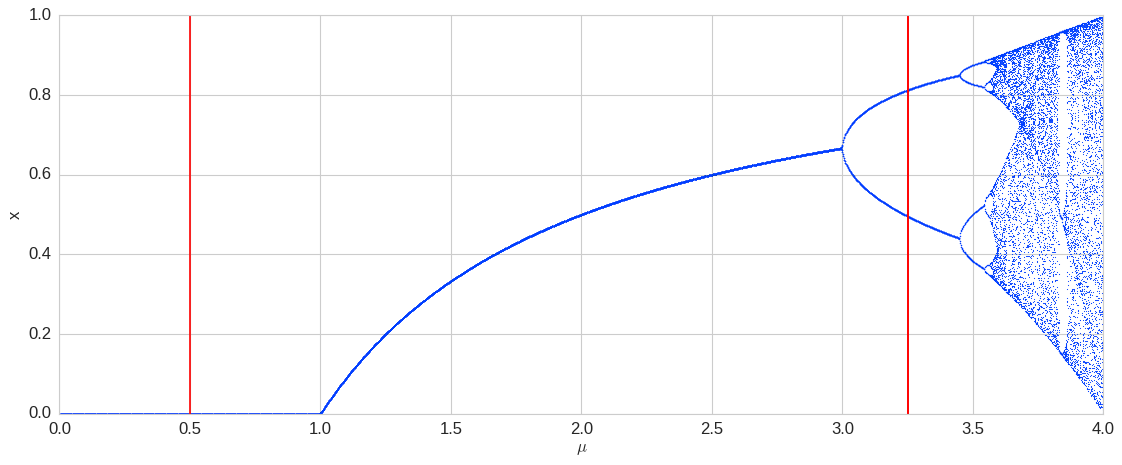

In [64]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style 
style.use('seaborn-whitegrid')

def f(x, r):
    return r * x * (1 - x)

ys = []
rs = np.linspace(0, 4, 2000)
#rs = np.linspace(3.5, 4, 2000) # For Figure 14.16.
for r in rs:
    x = 0.1
    for i in range(500):
        x = f(x, r)
    for i in range(50):
        x = f(x, r)
        ys.append([r, x])

ys = np.array(ys)

fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(ys[:, 0], ys[:, 1],'.', markersize=2)
plt.axvline(x=3.25,color='r')
plt.axvline(x=.5, ymin=0, ymax=1,linewidth=1.5,color='r')

plt.xlabel('$\mu$', fontsize=15)
plt.ylabel('x', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()



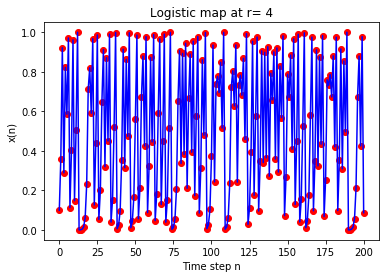

In [11]:
 # The state space is the unit interval:
#       x in [0,1]
# and the control parameter ranges in
#       r in [0,4]

# Import plotting routines
from pylab import *

# System Parameters
# Control parameter of the map: A period-3 cycle
r = 4
# Set up an array of iterates and set the initital condition
x = [0.1]
# The number of iterations to generate
N = 200

# The main loop that generates iterates and stores them
for n in range(0,N):
  # at each iteration calculate x_n+1
  # and append to list x
  x.append( r*x[n]*(1.-x[n]) )

# Setup the plot
xlabel('Time step n') # set x-axis label
ylabel('x(n)') # set y-axis label
title('Logistic map at r= ' + str(r)) # set plot title
# Plot the time series: once with circles, once with lines
plot(x, 'ro', x , 'b')

# Use command below to save figure
#savefig('LogisticMap', dpi=600)

# Display the plot in a window
show()


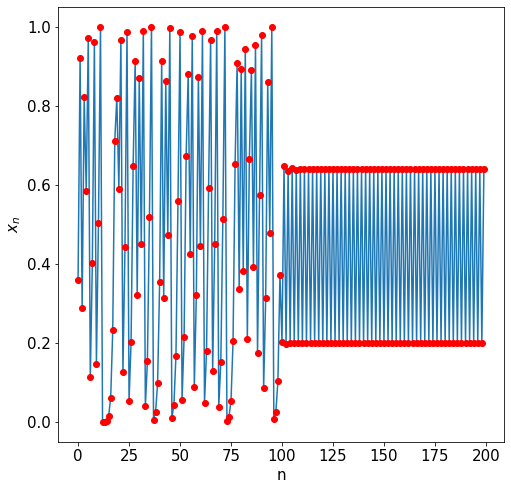

In [8]:
# %load Program_19a.py
# Program 19a: Chaos control in the logistic map.
# Control to period two.
# See Figure 19.3(b).

import matplotlib.pyplot as plt
import numpy as np

# Parameters
mu = 4
k = 0.217
num_iterations = 100
xs, x = [], [0.1]
ns = np.arange(0, num_iterations, 2)
nsc = np.arange(num_iterations, 2*num_iterations, 2)

for n in ns:
    x1 = mu*x[n] * (1 - x[n])
    x.append(x1)
    xs.append([n, x1])
    x2 = mu*x1 * (1 - x1)
    x.append(x2)
    xs.append([n+1, x2])

for n in nsc:
    x1 = k*mu*x[n] * (1 - x[n])
    x.append(x1)
    xs.append([n, x1])
    x2 = mu*x1 * (1 - x1)
    x.append(x2)
    xs.append([n+1, x2])

xs = np.array(xs)

fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(xs[:, 0], xs[:, 1])
plt.plot(xs[:, 0], xs[:, 1], 'ro')

plt.xlabel('n', fontsize=15)
plt.ylabel(r'$x_n$', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()
